# Prompt Selection Visualization

We've sent our work to IEEE Access. This is reviewer 5's concern 13:

> It would also be nice if authors could visualise a step-by-step of the selection process; it would make it easy to understand for readers.

This notebook creates the images needed to improve figure 2 and better explain the prompt selection process.

For the sake of simplicity, only one of the centroids is used.

First of all, import the required libraries:

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import center_of_mass
from PIL import Image

These variables store the path of the slices (image and masks) we are going to work with:

In [2]:
data_folder_path = Path('data')
image_name = 'coronacases_001'
slice_number = 98
image_file_path = Path(f'{image_name}_image_slice_{slice_number}.npy')
masks_file_path = Path(f'{image_name}_masks_slice_{slice_number}.npy')
image_slice_path = data_folder_path / image_file_path
masks_slice_path = data_folder_path / masks_file_path

These constants hold the names of the files the generated images will be save to:

In [3]:
CentroidFirstAttemptFileName = '1-centroid_first_attempt.png'
CentroidIsOutsideFileName = '2-centroid_is_outside.png'
CentroidOnlyFileName = '3-centroid_only.png'
CentroidLinesFileName = '4-centroid_lines.png'
CentroidMovedInsideFileName = '5-centroid_moved_inside.png'
SliceWindowedFileName = '6-slice_windowed.png'
WhiteMaskFileName = '7-white_mask.png'

Let's load the image slice:

In [4]:
image_slice = np.load(image_slice_path)
image_slice.shape

(512, 512)

Let's apply windowing to the slice (more details about this process in **windowing.ipynb**):

In [5]:
window_width = 1500
window_level = -650

image_slice = image_slice[:, :].clip(
    window_level - window_width // 2,
    window_level + window_width // 2)

Now, let's load the masks slice:

In [6]:
masks_slice = np.load(masks_slice_path)
masks_slice.shape

(512, 512)

Before working with the slice and the masks, let's transform them as described in the notebook **coordinates_conventions.ipynb**:

In [7]:
image_slice = image_slice.swapaxes(0, 1)
masks_slice = masks_slice.swapaxes(0, 1)

We will use the row, columns coordinates convention.

Let's calculate the center of mass of each mask. The number of masks is not fixed, and it could be that no masks were saved to the file, because the organ being segmented was not present in the image:

In [8]:
masks_indexes = np.unique(masks_slice)
print(f'Masks values: {masks_indexes}')

masks_centers_of_mass = []
if len(masks_indexes) > 1:
    for mask_index in np.arange(start=1, stop=masks_indexes.max() + 1):
        mask = masks_slice == mask_index
        mask_center_of_mass = center_of_mass(mask)
        masks_centers_of_mass.append(mask_center_of_mass)

masks_centers_of_mass = np.array(masks_centers_of_mass).astype(np.uint)
print(f'Masks centers of mass: {masks_centers_of_mass}')

Masks values: [0 1 2]
Masks centers of mass: [[292 339]
 [298 167]]


Show the slice and the centroids in the same plot, without masks:

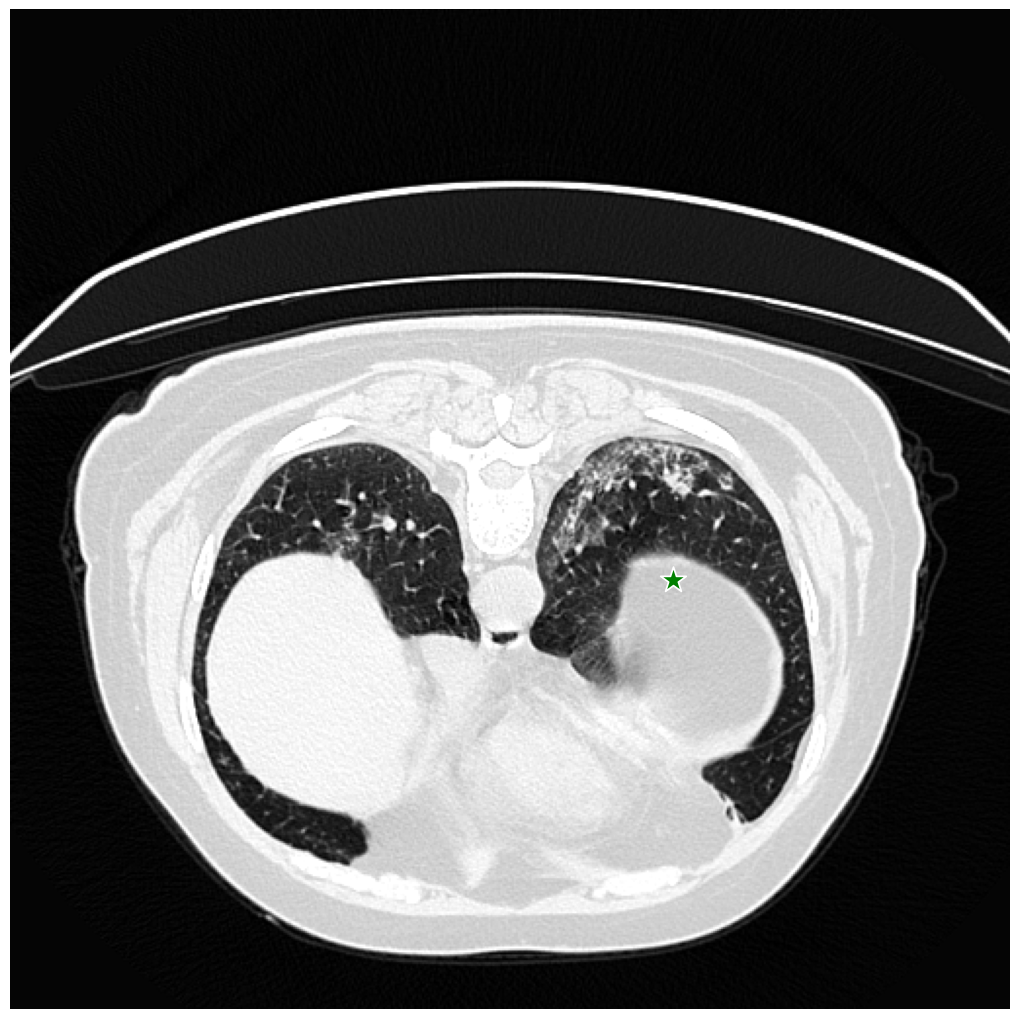

In [9]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(image_slice)
plt.scatter(x=masks_centers_of_mass[0][1], y=masks_centers_of_mass[0][0], color='green', marker='*', s=375, edgecolor='white',
               linewidth=1.25)
# plt.scatter(x=masks_centers_of_mass[1][1], y=masks_centers_of_mass[1][0], color='green', marker='*', s=375, edgecolor='white',
#                linewidth=1.25)
plt.savefig(CentroidFirstAttemptFileName)
plt.show()

Now, let's show those centers of mass. To make sure everything makes sense, only the mask marked with ones and its center of mass will be shown.

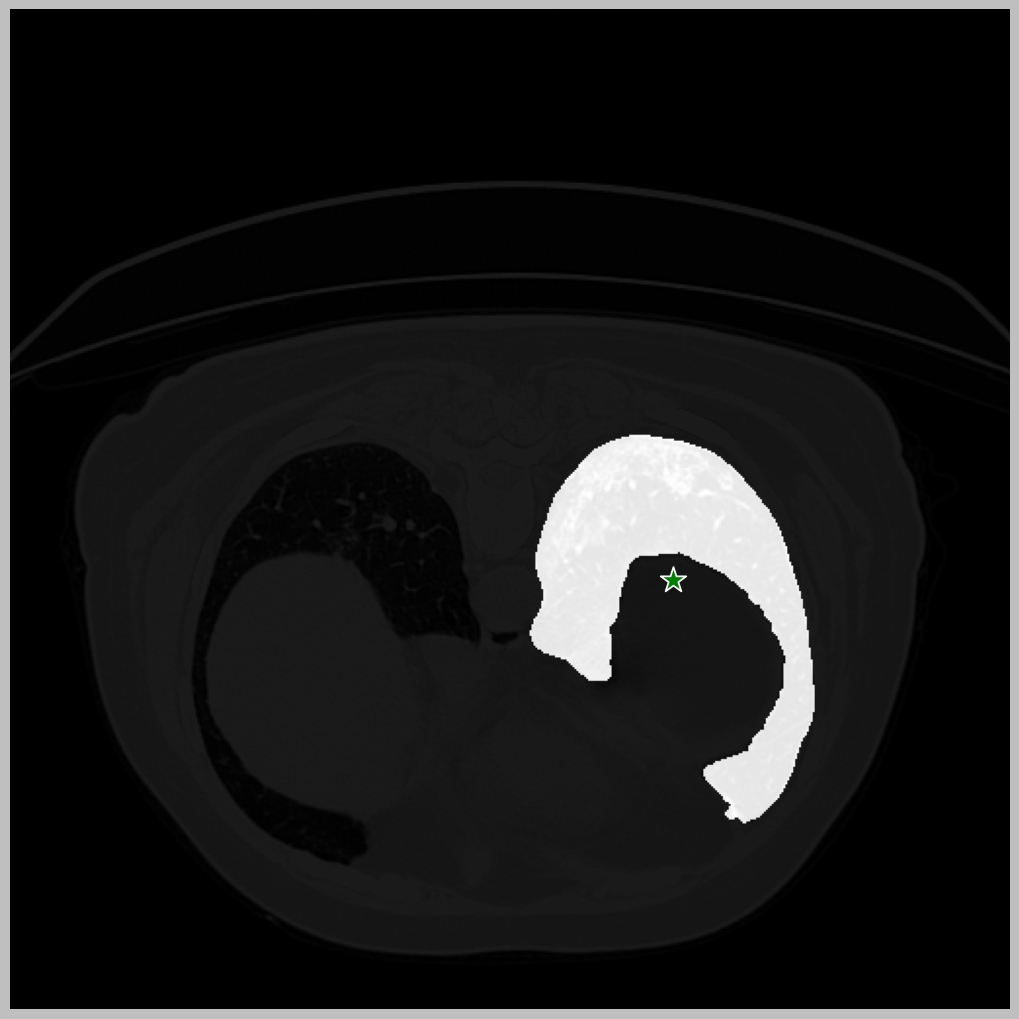

In [10]:
mask_index = 0
mask = masks_slice == mask_index + 1
mask_center_of_mass = masks_centers_of_mass[mask_index]

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(image_slice)
plt.imshow(mask, alpha=0.9)
plt.scatter(x=masks_centers_of_mass[0][1], y=masks_centers_of_mass[0][0], color='green', marker='*', s=375, edgecolor='white',
               linewidth=1.25)
# plt.scatter(x=masks_centers_of_mass[1][1], y=masks_centers_of_mass[1][0], color='green', marker='*', s=375, edgecolor='white',
#                linewidth=1.25)
plt.savefig(CentroidIsOutsideFileName)
plt.show()

Let's draw only the centroid:

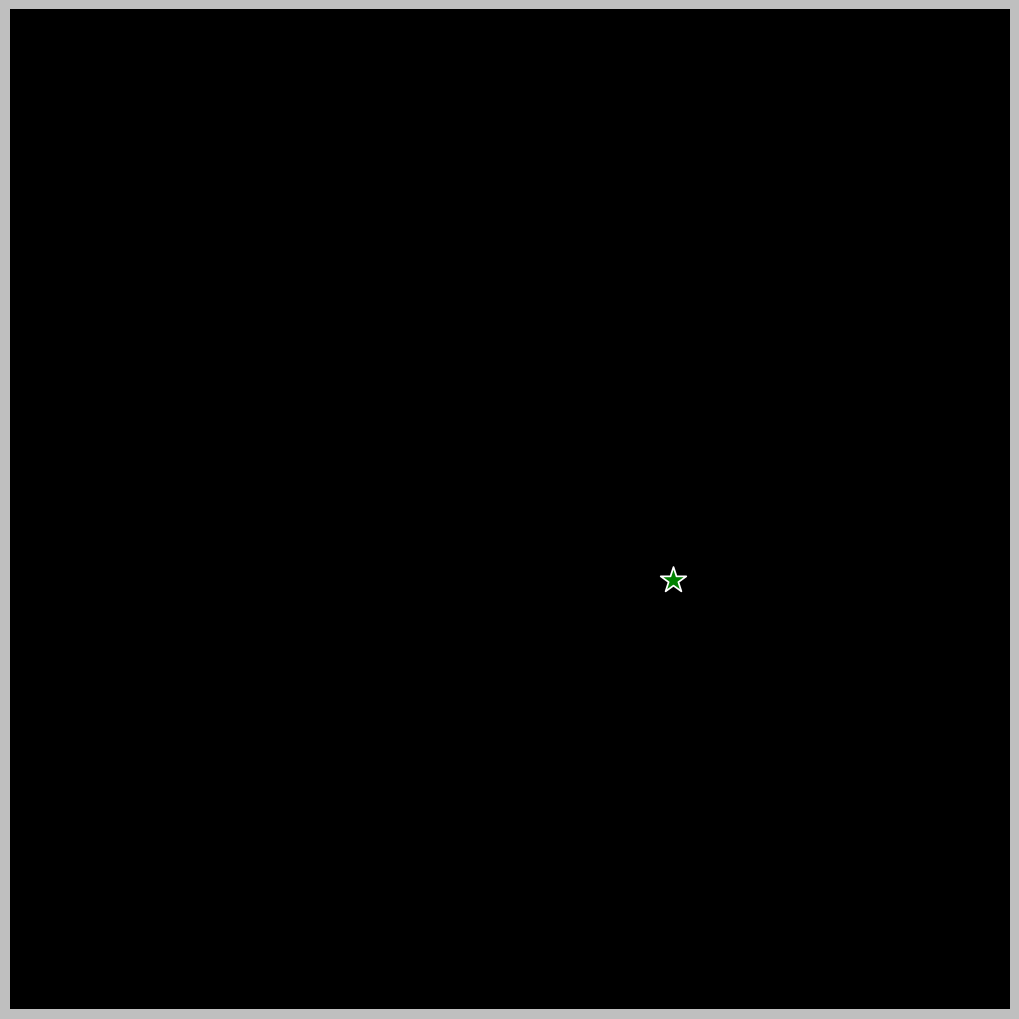

In [19]:
mask_index = 0
black_background = masks_slice == 255

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(black_background)
# plt.imshow(image_slice)
# plt.imshow(mask, alpha=0.9)
plt.scatter(x=masks_centers_of_mass[0][1], y=masks_centers_of_mass[0][0], color='green', marker='*', s=375, edgecolor='white',
               linewidth=1.25)
# plt.scatter(x=masks_centers_of_mass[1][1], y=masks_centers_of_mass[1][0], color='green', marker='*', s=375, edgecolor='white',
#                linewidth=1.25)
plt.savefig(CentroidOnlyFileName)
plt.show()

Let's draw horizontal and vertical lines that go through each centroid:

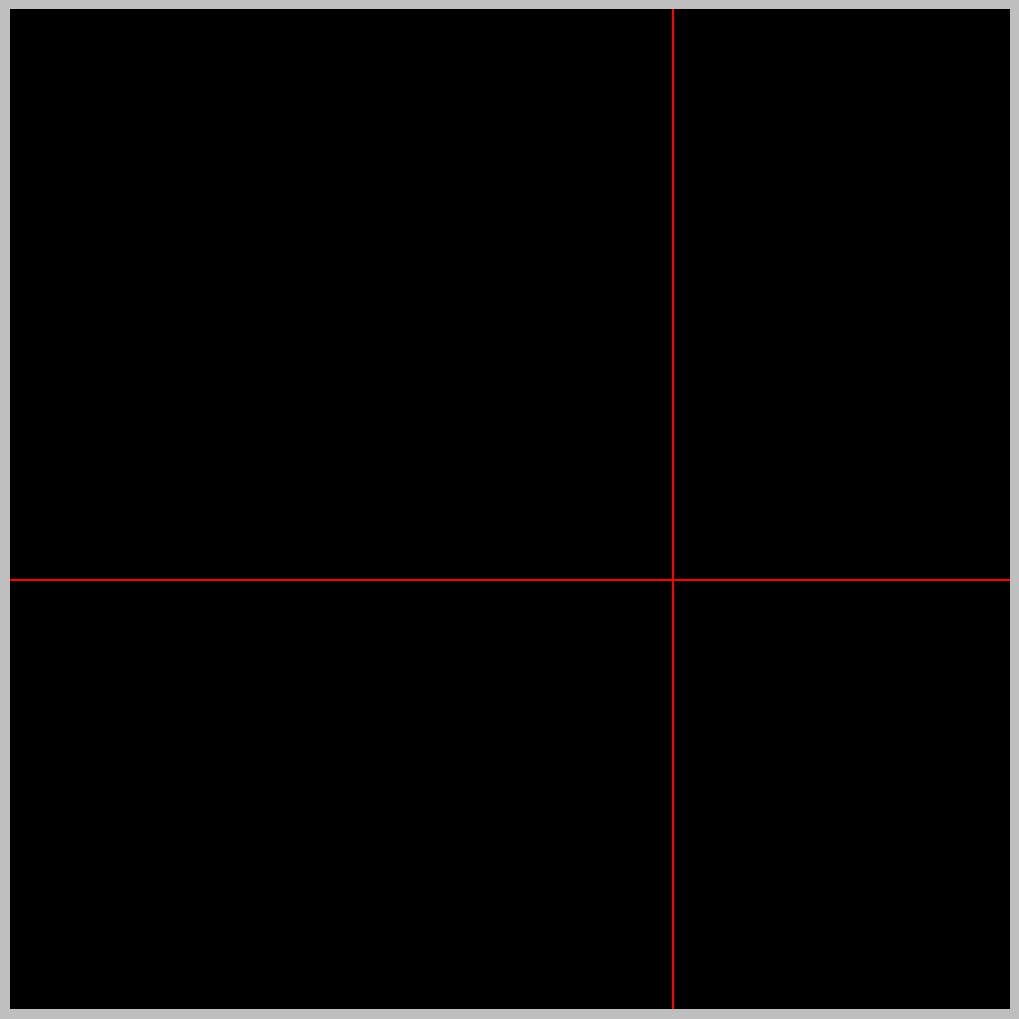

In [12]:
mask_index = 0
mask = masks_slice == mask_index + 1
mask_center_of_mass = masks_centers_of_mass[mask_index]
black_background = masks_slice == 255

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(black_background)
# plt.imshow(masks_slice, alpha=0.7)
# plt.scatter(x=masks_centers_of_mass[0][1], y=masks_centers_of_mass[0][0], color='green', marker='*', s=375, edgecolor='white',
#                linewidth=1.25, zorder=1)
# plt.scatter(x=masks_centers_of_mass[1][1], y=masks_centers_of_mass[1][0], color='green', marker='*', s=375, edgecolor='white',
#                linewidth=1.25, zorder=1)
plt.axhline(y=masks_centers_of_mass[0][0], color = 'r', linestyle = '-', zorder=0)
plt.axvline(x=masks_centers_of_mass[0][1], color = 'r', linestyle = '-', zorder=0)
# plt.axhline(y=masks_centers_of_mass[1][0], color = 'r', linestyle = '-', zorder=0)
# plt.axvline(x=masks_centers_of_mass[1][1], color = 'r', linestyle = '-', zorder=0)
plt.savefig(CentroidLinesFileName)
plt.show()


Now, let's fix the centroids (code taken from **mask_center.ipynb**):

In [13]:
print(f'mask: {mask.shape}')

mask_center_of_mass = masks_centers_of_mass[mask_index]
row = int(mask_center_of_mass[0])
column = int(mask_center_of_mass[1])

print(f'mask_center_of_mass: {mask_center_of_mass}')
print(f'row, column: {row}, {column}')

mask_points_left = mask[row, :column]
mask_points_right = mask[row, column + 1:]
mask_points_above = mask[:row, column]
mask_points_below = mask[row + 1:, column]

print(f'Points left: {len(mask_points_left)}')
print(f'Points right: {len(mask_points_right)}')
print(f'Points above: {len(mask_points_above)}')
print(f'Points below: {len(mask_points_below)}')

print(f'Mask points left: {np.sum(mask_points_left)}')
print(f'Mask points right: {np.sum(mask_points_right)}')
print(f'Mask points above: {np.sum(mask_points_above)}')
print(f'Mask points below: {np.sum(mask_points_below)}')

mask_segment = np.where(mask_points_above == True)[0]
mask_segment_center_index = len(mask_segment) // 2
mask_segment_center = int(mask_segment[mask_segment_center_index])
new_point = mask_segment_center, column

new_row = new_point[0]
new_column = new_point[1]

print(f'new row: {new_row}')
print(f'new column: {new_column}')



mask: (512, 512)
mask_center_of_mass: [292 339]
row, column: 292, 339
Points left: 339
Points right: 172
Points above: 292
Points below: 219
Mask points left: 44
Mask points right: 34
Mask points above: 59
Mask points below: 0
new row: 249
new column: 339


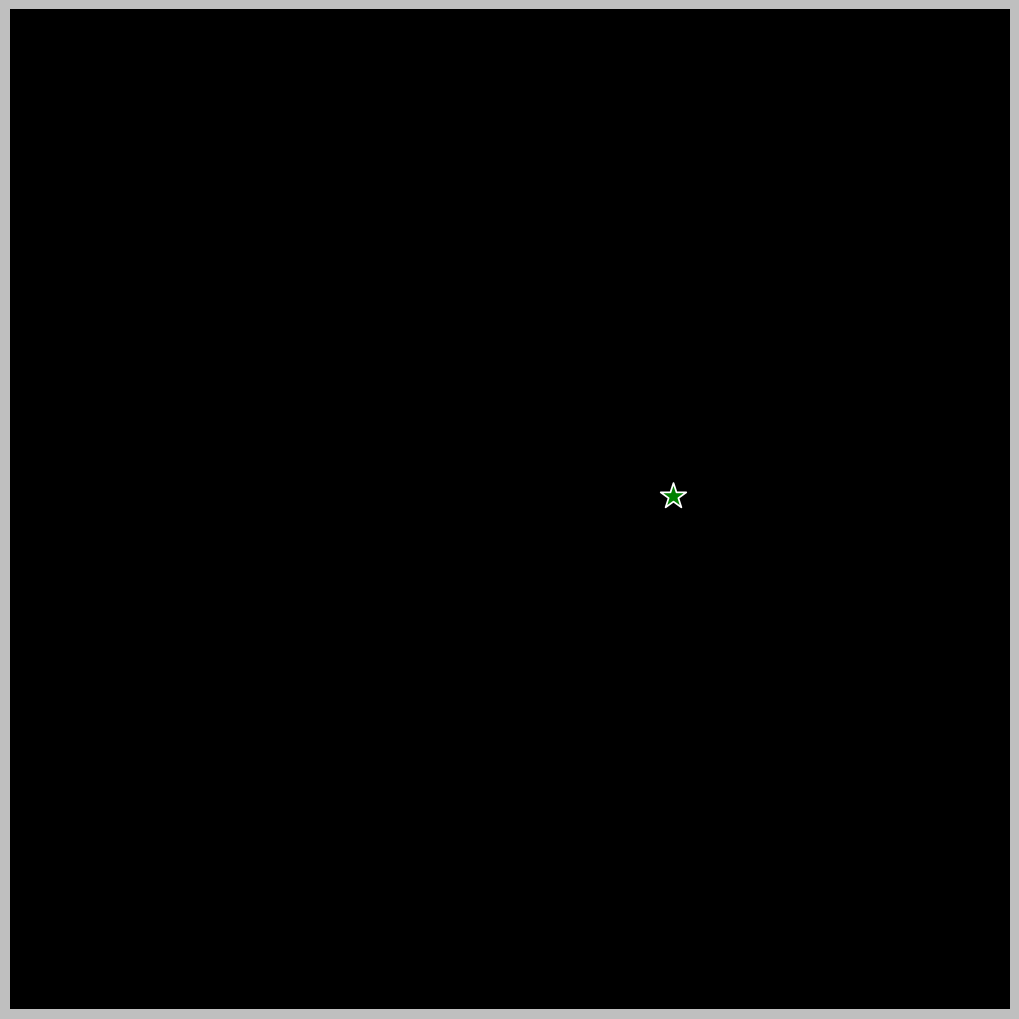

In [21]:
mask_index = 0
mask = masks_slice == mask_index + 1
mask_center_of_mass = masks_centers_of_mass[mask_index]
black_background = masks_slice == 255

plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(black_background)
# plt.imshow(image_slice)
# plt.imshow(mask, alpha=0.9)

colors = plt.colormaps['rainbow'](np.linspace(0, 1, len(masks_centers_of_mass) + 1))
# plt.scatter(column, row, color=colors[0])
plt.scatter(new_column, new_row, color='green', marker='*', s=375, edgecolor='white',
               linewidth=1.25)
plt.savefig(CentroidMovedInsideFileName)

Save both images as PNGs:

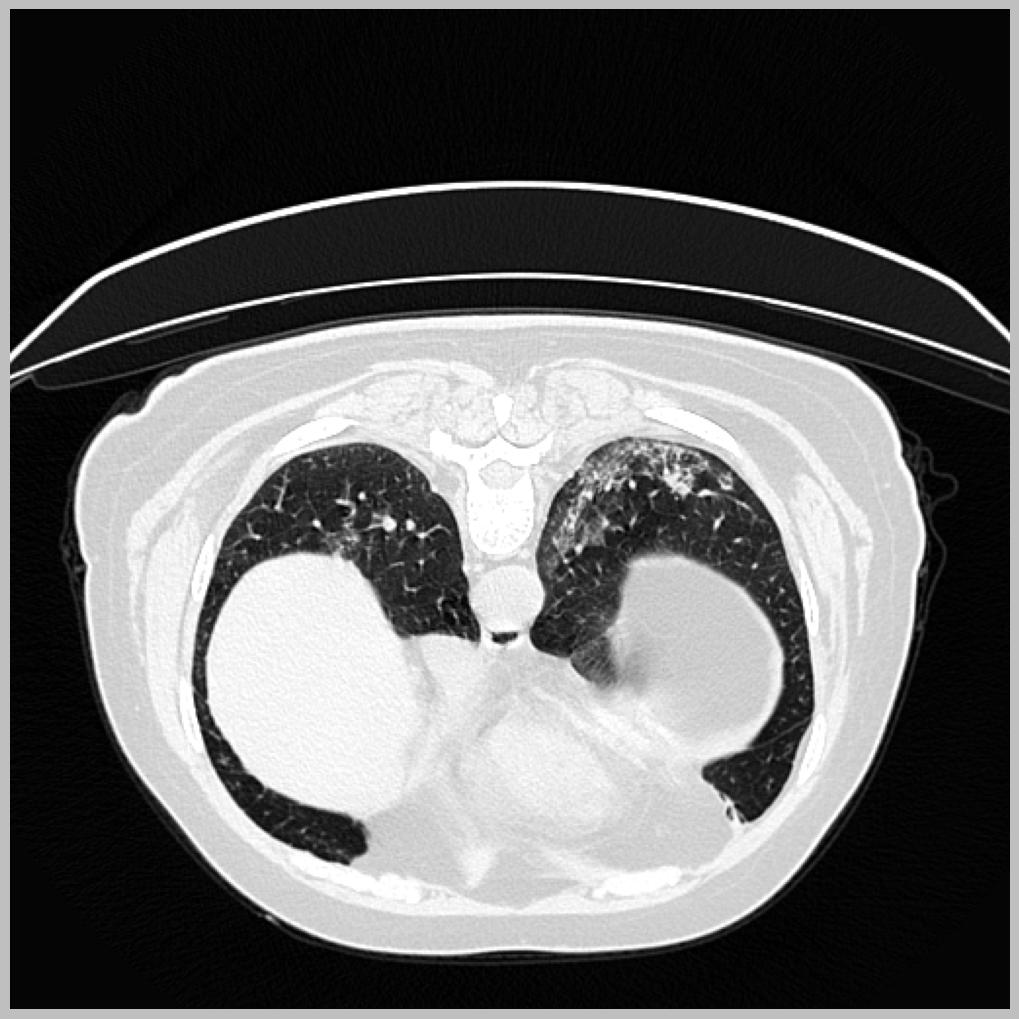

In [15]:
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(image_slice)
plt.savefig(SliceWindowedFileName)

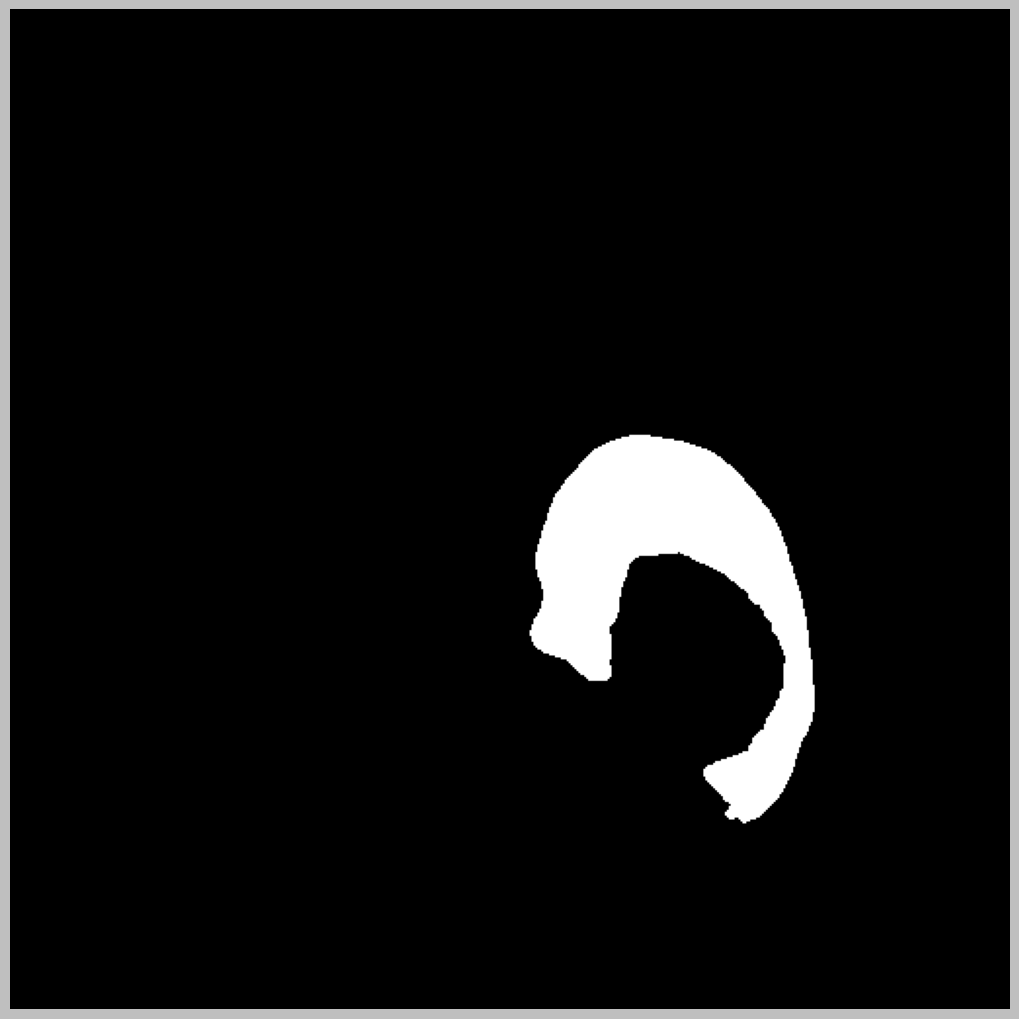

In [16]:
white_masks_slice = masks_slice == 1
plt.figure(figsize=(10, 10))
plt.style.use('grayscale')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(white_masks_slice)
plt.savefig(WhiteMaskFileName)

Let rotate all the generated images 180 degrees:

In [22]:
def rotate_image(file_name: str):
    image = Image.open(file_name)
    rotated_image = image.rotate(180)
    rotated_image.save(file_name)

rotate_image(CentroidFirstAttemptFileName)
rotate_image(CentroidIsOutsideFileName)
rotate_image(CentroidOnlyFileName)
rotate_image(CentroidLinesFileName)
rotate_image(CentroidMovedInsideFileName)
rotate_image(SliceWindowedFileName)
rotate_image(WhiteMaskFileName)